<a href="https://colab.research.google.com/github/Dextinedsam79/AI-CLASS-DEMO/blob/dev/raisin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install google-ml-edu \
keras \
matplotlib \
numpy \
pandas \
tensorflow

print("\n\nAll requirements successfully installed.")



All requirements successfully installed.


In [31]:
# @title Load the imports
import keras
import ml_edu.experiment
import ml_edu.results
import numpy as np
import pandas as pd
import plotly.express as px

#These lines adjust the reporting granularity
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [32]:
#!/bin/bash
raisin_ds_raw = "curl -L -o ~/Downloads/raisin-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/huseyincenik/raisin-dataset"

In [33]:


df = pd.read_excel("Raisin_Dataset.xlsx")
print(df.head())


    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524            442.2            253.3           0.8       90546     0.8   
1  75166            406.7            243.0           0.8       78789     0.7   
2  90856            442.3            266.3           0.8       93717     0.6   
3  45928            286.5            208.8           0.7       47336     0.7   
4  79408            352.2            290.8           0.6       81463     0.8   

   Perimeter    Class  
0     1184.0  Kecimen  
1     1121.8  Kecimen  
2     1208.6  Kecimen  
3      844.2  Kecimen  
4     1073.3  Kecimen  


In [34]:
df['Class_num'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class_num'] = le.fit_transform(df['Class'])


In [36]:
dict(zip(le.classes_, le.transform(le.classes_)))


{'Besni': np.int64(0), 'Kecimen': np.int64(1)}

In [37]:
print(df[['Class', 'Class_num']].head())


     Class  Class_num
0  Kecimen          1
1  Kecimen          1
2  Kecimen          1
3  Kecimen          1
4  Kecimen          1


In [38]:
print(list(df.columns))

['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class', 'Class_num']


# *Load the dataset*

In [39]:
#title
# Read and provide statistical description of the datasets
raisin_ds = df[[
    'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class_num'
]]
raisin_ds.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_num
count,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0
mean,87804.1,430.9,254.5,0.8,91186.1,0.7,1165.9,0.5
std,39002.1,116.0,50.0,0.1,40769.3,0.1,273.8,0.5
min,25387.0,225.6,143.7,0.3,26139.0,0.4,619.1,0.0
25%,59348.0,345.4,219.1,0.7,61513.2,0.7,966.4,0.0
50%,78902.0,407.8,247.8,0.8,81651.0,0.7,1119.5,0.5
75%,105028.2,494.2,279.9,0.8,108375.8,0.7,1308.4,1.0
max,235047.0,997.3,492.3,1.0,278217.0,0.8,2697.8,1.0


In [40]:
#Create five 2D plots of the features against each other, color coded by class

for x_axis_data, y_axis_data in [
    ('Area', 'Eccentricity'),
    ('ConvexArea', 'Perimeter'),
    ('MajorAxisLength', 'MinorAxisLength'),
    ('Perimeter', 'Extent'),
    ('Eccentricity', 'MajorAxisLength'),
]:
  px.scatter(raisin_ds, x=x_axis_data, y=y_axis_data, color='Class_num').show()

In [41]:
#Calculate the z-scores of each numerical cols the raw dataset
#write into a new DF named df_norm
feature_mean = raisin_ds.mean(numeric_only=True)
feature_std = raisin_ds.std(numeric_only=True)
numerical_features = raisin_ds.select_dtypes('number').columns
normalized_dataset = (raisin_ds[numerical_features]-feature_mean)/feature_std
#copy the class to the new DF
normalized_dataset['Class_num'] = raisin_ds['Class_num']
#Examine some of the values of the normalized training set. Notice that most Z-series fall btw -2 & +2
normalized_dataset.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_num
0,-0.0,0.1,-0.0,0.4,-0.0,1.1,0.1,1
1,-0.3,-0.2,-0.2,0.2,-0.3,-0.3,-0.2,1
2,0.1,0.1,0.2,0.2,0.1,-1.2,0.2,1
3,-1.1,-1.2,-0.9,-1.1,-1.1,0.0,-1.2,1
4,-0.2,-0.7,0.7,-2.4,-0.2,1.7,-0.3,1


In [42]:
keras.utils.set_random_seed(42)

In [43]:
normalized_dataset['Class_Bool'] = (normalized_dataset['Class_num']=='Besni').astype(int)
normalized_dataset.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_num,Class_Bool
70,0.2,0.2,0.5,0.0,0.2,-0.5,0.3,1,0
827,-0.7,-0.7,-0.4,-0.5,-0.6,0.1,-0.4,0,0
231,-0.9,-1.3,-0.2,-2.9,-0.9,0.7,-1.0,1,0
588,0.6,1.0,0.3,1.0,0.6,0.8,0.8,0,0
39,-1.0,-1.2,-0.6,-1.6,-1.0,1.3,-1.2,1,0
731,-0.1,-0.2,0.3,-0.4,-0.1,-0.5,-0.1,0,0
299,-1.3,-1.5,-1.5,-0.8,-1.3,-0.1,-1.6,1,0
110,-0.2,-0.3,0.2,-0.5,-0.2,-0.0,0.1,1,0
72,-0.5,-0.4,-0.3,-0.1,-0.4,-0.0,-0.3,1,0
86,-0.4,-0.3,-0.4,0.2,-0.4,-0.7,-0.5,1,0


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


In [45]:
train_dataset, test_dataset = train_test_split(df, test_size =0.1)
x_train = train_dataset.drop('Class', axis=1)
y_train = train_dataset['Class']
x_test = test_dataset.drop('Class', axis=1)
y_test = test_dataset['Class']

In [46]:
print(x_train.dtypes)
print(x_train.head())

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class_num            int64
dtype: object
       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
248   62064            352.4            227.9           0.8       64811   
212   57271            372.7            197.0           0.8       58786   
183   43461            333.7            169.3           0.9       45669   
496  113608            559.3            264.0           0.9      118098   
802   71502            490.4            189.4           0.9       75157   

     Extent  Perimeter  Class_num  
248     0.7     1004.2          1  
212     0.8      949.9          1  
183     0.7      867.4          1  
496     0.6     1394.1          0  
802     0.5     1182.9          0  


In [47]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [48]:
model = LogisticRegression(verbose=1)


In [49]:
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [50]:
y_pred = model.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [52]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[52  0]
 [ 0 38]]


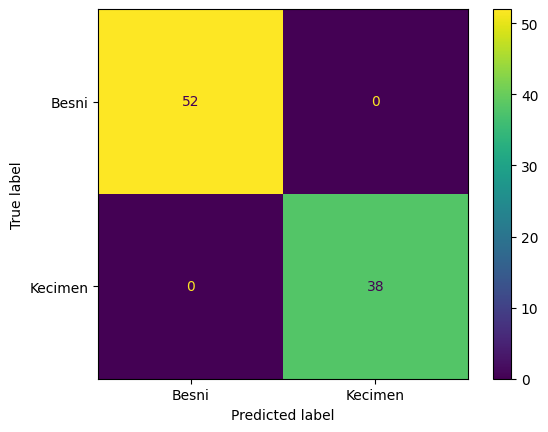

In [55]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot()


In [58]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
